# Dependency Parsing
Dependency Parsing (DP) refers to examining the dependencies between the words of a sentence to analyze its grammatical structure. A sentence is broken into several components. The concept is that there is a direct link between every linguistic unit of a sentence. These links are termed dependencies. 
<img src ='https://www.upgrad.com/blog/wp-content/uploads/2021/03/D1.jpg'>

# Stanford parser: 
This is a natural language parser implemented on Java. You need the Stanford CoreNLP parser to perform dependency parsing. The parser includes several languages including English, Chinese, German, and Arabic. 

In [1]:
!wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
!wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2-models-english.jar
!unzip /content/stanford-corenlp-4.2.2.zip

--2021-12-06 05:29:10--  https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip [following]
--2021-12-06 05:29:10--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 504278711 (481M) [application/zip]
Saving to: ‘stanford-corenlp-4.2.2.zip’

stanford-corenlp-4. 100%[===================>] 480.92M  5.10MB/s    in 91s     

2021-12-06 05:30:42 (5.26 MB/s) - ‘stanford-corenlp-4.2.2.zip’ saved [504278711/504278711]

--2021-12-06 05:30:43--  https://nlp.st

In [1]:
from nltk.parse.stanford import StanfordDependencyParser

In [4]:
from nltk.parse.stanford import StanfordDependencyParser

# Path to CoreNLP jar unzipped
jar_path = './stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'

# Path to CoreNLP model jar
models_jar_path = 'stanford-corenlp-4.2.2-models-english.jar'

sentence = 'Deemed universities charge huge fees'

# Initialize StanfordDependency Parser from the path
parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)

# Parse the sentence
result = parser.raw_parse(sentence)
dependency = result.__next__()


print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
print ("-" * 75)
  
# Use dependency.triples() to extract the dependency triples in the form
# ((head word, head POS), relation, (dependent word, dependent POS))  
for dep in list(dependency.triples()):
  print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}"
         .format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))


Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
charge          | VBP        | nsubj      | universities    | NNS       
universities    | NNS        | compound   | Deemed          | NNP       
charge          | VBP        | obj        | fees            | NNS       
fees            | NNS        | amod       | huge            | JJ        


## Visualize using NetworkX

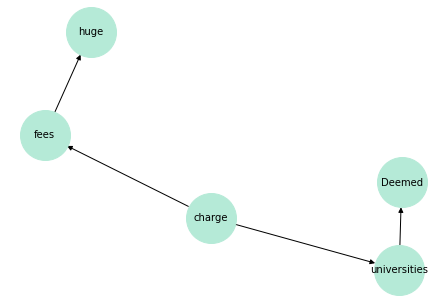

In [5]:
# importing networkx
import networkx as nx
import matplotlib.pyplot as plt
# Using reverse() to reverse the direction of edges as nx_graph() returns inverted edges
G = dependency.nx_graph().reverse()
# nx_graph() returns numeric node labels starting from 1
# Create a dictionary to map numeric nodes and words in the sentence
words = sentence.split(" ")
labels = {index + 1: words[index] for index in range(len(words))}
nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)

## Using Stanza
Stanford NLP Group have also developed Stanza. It provides a Neural Network NLP Pipeline that can be customized and a Python wrapper over Stanford CoreNLP package, making it easier to use the CoreNLP features without downloading the jar files.

In [8]:
!pip install stanza

     |████████████████████████████████| 432 kB 28.1 MB/s eta 0:00:01


******************************************************************
The next step is to import stanza and download the required language model.

In [9]:
import stanza
stanza.download('en')

In [10]:
nlp = stanza.Pipeline('en',
                     processors = 'tokenize,mwt,pos,lemma,depparse')

/opt/conda/lib/python3.7/site-packages/torch/cuda/__init__.py:106: UserWarning: 
A100-SXM4-40GB with CUDA capability sm_80 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_60 sm_70 sm_75 compute_70 compute_75.
If you want to use the A100-SXM4-40GB GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [11]:
doc = nlp(sentence)

In [12]:
doc.sentences

[[
   {
     "id": 1,
     "text": "Deemed",
     "lemma": "Deem",
     "upos": "VERB",
     "xpos": "VBN",
     "feats": "Tense=Past|VerbForm=Part",
     "head": 2,
     "deprel": "amod",
     "start_char": 0,
     "end_char": 6
   },
   {
     "id": 2,
     "text": "universities",
     "lemma": "university",
     "upos": "NOUN",
     "xpos": "NNS",
     "feats": "Number=Plur",
     "head": 3,
     "deprel": "nsubj",
     "start_char": 7,
     "end_char": 19
   },
   {
     "id": 3,
     "text": "charge",
     "lemma": "charge",
     "upos": "VERB",
     "xpos": "VBP",
     "feats": "Mood=Ind|Tense=Pres|VerbForm=Fin",
     "head": 0,
     "deprel": "root",
     "start_char": 20,
     "end_char": 26
   },
   {
     "id": 4,
     "text": "huge",
     "lemma": "huge",
     "upos": "ADJ",
     "xpos": "JJ",
     "feats": "Degree=Pos",
     "head": 5,
     "deprel": "amod",
     "start_char": 27,
     "end_char": 31
   },
   {
     "id": 5,
     "text": "fees",
     "lemma": "fee",
     "u

In [13]:
import stanza

# Download the language model
stanza.download('en')

sentence = 'Deemed universities charge huge fees'

# Build a Neural Pipeline
nlp = stanza.Pipeline('en', processors = "tokenize,mwt,pos,lemma,depparse") 

# Pass the sentence through the pipeline
doc = nlp(sentence)

# Print the dependencies of the first sentence in the doc object
# Format - (Token, Index of head, Nature of dependency)
# Index starts from 1, 0 is reserved for ROOT
doc.sentences[0].print_dependencies()


print ("{:<15} | {:<10} | {:<15} ".format('Token', 'Relation', 'Head'))
print ("-" * 50)
  
# Convert sentence object to dictionary  
sent_dict = doc.sentences[0].to_dict()

# iterate to print the token, relation and head
for word in sent_dict:
  print ("{:<15} | {:<10} | {:<15} "
         .format(str(word['text']),str(word['deprel']), str(sent_dict[word['head']-1]['text'] if word['head'] > 0 else 'ROOT')))


('Deemed', 2, 'amod')
('universities', 3, 'nsubj')
('charge', 0, 'root')
('huge', 5, 'amod')
('fees', 3, 'obj')
Token           | Relation   | Head            
--------------------------------------------------
Deemed          | amod       | universities    
universities    | nsubj      | charge          
charge          | root       | ROOT            
huge            | amod       | fees            
fees            | obj        | charge          


# Constituency Parsing
Constituency Parsing is based on context-free grammars. Here, the parse tree includes sentences broken into sub-phrases, each belonging to a grammar category. Every linguistic unit or word in a sentence acts as a terminal node, which has its parent node and a part-of-speech tag.

<img src = "https://www.upgrad.com/blog/wp-content/uploads/2021/03/D2.jpg">

# Dependency Parsing vs Constituency Parsing
Constituency parsing can also be implemented using the Stanford parser. It essentially parses a given sentence as per the constituency parser and subsequently converts the constituency parse tree into a dependency tree. 

If your goal is to break a sentence into sub-phrases, you should implement constituency parsing. However, if you want to explore the dependencies between the words in a sentence, you should use dependency parsing. 

In [15]:
import nltk
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)


In [16]:
sent = "Mary saw Bob".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
    print(tree)

(S (NP Mary) (VP (V saw) (NP Bob)))
